# AIM - The Aim of this ML Project is to get a reasonable price of pre-owned car.

# Step-1 Importing data and reading it's behaviour.

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [2]:
df=pd.concat([train,test],axis=0)  # joining two dataset along the row(axis=0)

In [3]:
df.shape

(7253, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 1233
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 850.0+ KB


In [5]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

# A) Dealing with NaN values in data 

In [6]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [7]:
df=df.dropna(how="any")  #removing rows that contains nan value

In [8]:
#df=df.dropna(subset=["Mileage","Engine","Power","Seats"])    

In [9]:
#df["Price"]=df["Price"].fillna(value=df["Price"].mean())  
#df["Price"]

# The above Two code that are commented down are very important in this project:-
# i) If the codeline(8 and 9) is implemented instead of codeline(7) then accuracy of the module changes very drastically compared to the codeline(7) the accuracy becomes very less (<60%).

# ii) If the codeline(7) is implemented instead of codeline(8 and 9) then accuracy of the module changes very drastically compared to the codeline(7) the accuracy becomes high (>85%). 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 2 to 6014
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         823 non-null    int64  
 1   Name               823 non-null    object 
 2   Location           823 non-null    object 
 3   Year               823 non-null    int64  
 4   Kilometers_Driven  823 non-null    int64  
 5   Fuel_Type          823 non-null    object 
 6   Transmission       823 non-null    object 
 7   Owner_Type         823 non-null    object 
 8   Mileage            823 non-null    object 
 9   Engine             823 non-null    object 
 10  Power              823 non-null    object 
 11  Seats              823 non-null    float64
 12  New_Price          823 non-null    object 
 13  Price              823 non-null    float64
dtypes: float64(2), int64(3), object(9)
memory usage: 96.4+ KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 2 to 6014
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         823 non-null    int64  
 1   Name               823 non-null    object 
 2   Location           823 non-null    object 
 3   Year               823 non-null    int64  
 4   Kilometers_Driven  823 non-null    int64  
 5   Fuel_Type          823 non-null    object 
 6   Transmission       823 non-null    object 
 7   Owner_Type         823 non-null    object 
 8   Mileage            823 non-null    object 
 9   Engine             823 non-null    object 
 10  Power              823 non-null    object 
 11  Seats              823 non-null    float64
 12  New_Price          823 non-null    object 
 13  Price              823 non-null    float64
dtypes: float64(2), int64(3), object(9)
memory usage: 96.4+ KB


In [12]:
df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [13]:
df=df.drop("New_Price",axis=1)  #column new_price large amount nan value and column unnamed is of no use so we will drop them
df=df.drop("Unnamed: 0",axis=1)

In [14]:
print("total number of rows :",df.shape[0])
print("total number of columns :",df.shape[1])


total number of rows : 823
total number of columns : 12


In [15]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56 kmpl,1462 CC,103.25 bhp,5.0,9.95
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,15.00
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,18.55
...,...,...,...,...,...,...,...,...,...,...,...,...
5999,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57 kmpl,1193 CC,88.7 bhp,5.0,4.00
6002,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09 kmpl,1598 CC,103.5 bhp,5.0,3.25
6005,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,7.43
6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.5 kmpl,1198 CC,86.8 bhp,5.0,3.20


# Step-2 Cleaning of the dataset.

# A) Converting columns[Mileage(Kmpl),Engine(cc),Power(bhp),Seats] into float as it may contain nan value

In [16]:
df["Mileage"]=df["Mileage"].str.replace("kmpl","")
df["Mileage"]=df["Mileage"].str.replace("km/kg","")
df["Engine"]=df["Engine"].str.replace("CC","")
df["Power"]=df["Power"].str.replace("null bhp","112")
df["Power"]=df["Power"].str.replace(" bhp","")

In [17]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

# C) I wanted all the numerical column in int dtype

In [18]:
df["Power"]=df["Power"].astype(float)

In [19]:
df["Mileage"]=df["Mileage"].astype(float)

In [20]:
df["Engine"]=df["Engine"].astype(int)

In [21]:
df["Seats"]=df["Seats"].astype(int)

In [22]:
df["Price"]=df["Price"].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 2 to 6014
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               823 non-null    object 
 1   Location           823 non-null    object 
 2   Year               823 non-null    int64  
 3   Kilometers_Driven  823 non-null    int64  
 4   Fuel_Type          823 non-null    object 
 5   Transmission       823 non-null    object 
 6   Owner_Type         823 non-null    object 
 7   Mileage            823 non-null    float64
 8   Engine             823 non-null    int32  
 9   Power              823 non-null    float64
 10  Seats              823 non-null    int32  
 11  Price              823 non-null    int32  
dtypes: float64(2), int32(3), int64(2), object(5)
memory usage: 73.9+ KB


In [24]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

# E) As the column (Name) looks jumbled we will make it more readable

# i) Creating a new column(comapany name) for car

In [25]:
df["Company Name"]=df["Name"].str.split(" ").str.slice(0,2).str.join(" ")

In [26]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company Name
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4,Honda Jazz
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8,17,Toyota Innova
10,Maruti Ciaz Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462,103.25,5,9,Maruti Ciaz
15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477,175.56,7,15,Mitsubishi Pajero
20,BMW 3 Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995,190.00,5,18,BMW 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,Tata Bolt Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57,1193,88.70,5,4,Tata Bolt
6002,Volkswagen Vento 1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09,1598,103.50,5,3,Volkswagen Vento
6005,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.30,1248,88.50,5,7,Maruti Vitara
6010,Honda Brio 1.2 VX MT,Delhi,2013,33746,Petrol,Manual,First,18.50,1198,86.80,5,3,Honda Brio


# ii) Now removing company name for cloumn(name)

In [27]:
df["Name"]=df["Name"].str.split(" ").str.slice(2,4).str.join(" ")

In [28]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company Name
2,V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4,Honda Jazz
7,Crysta 2.8,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8,17,Toyota Innova
10,Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462,103.25,5,9,Maruti Ciaz
15,Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477,175.56,7,15,Mitsubishi Pajero
20,Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995,190.00,5,18,BMW 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57,1193,88.70,5,4,Tata Bolt
6002,1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09,1598,103.50,5,3,Volkswagen Vento
6005,Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.30,1248,88.50,5,7,Maruti Vitara
6010,1.2 VX,Delhi,2013,33746,Petrol,Manual,First,18.50,1198,86.80,5,3,Honda Brio


# iv) Renaming the column (Name) with (Car model)

In [29]:
df=df.rename(columns={"Name":"Car Model"})

In [30]:
df

,Car Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company Name
2,V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4,Honda Jazz
7,Crysta 2.8,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8,17,Toyota Innova
10,Zeta,Kochi,2018,25692,Petrol,Manual,First,21.56,1462,103.25,5,9,Maruti Ciaz
15,Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477,175.56,7,15,Mitsubishi Pajero
20,Series 320d,Kochi,2014,32982,Diesel,Automatic,First,22.69,1995,190.00,5,18,BMW 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,Revotron XT,Chennai,2016,10000,Petrol,Manual,First,17.57,1193,88.70,5,4,Tata Bolt
6002,1.6 Highline,Mumbai,2011,38000,Petrol,Manual,First,16.09,1598,103.50,5,3,Volkswagen Vento
6005,Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.30,1248,88.50,5,7,Maruti Vitara
6010,1.2 VX,Delhi,2013,33746,Petrol,Manual,First,18.50,1198,86.80,5,3,Honda Brio


# iii) I wanted column (comapany model) to be placed before column(Name)

In [31]:
titles=list(df.columns)
titles

['Car Model',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Company Name']

In [32]:
titles[1],titles[12]=titles[12],titles[1]


In [33]:
titles

['Car Model',
 'Company Name',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Location']

In [34]:
titles[0],titles[1]=titles[1],titles[0]

In [35]:
titles[11],titles[12]=titles[12],titles[11]

In [36]:
df=df[titles]

In [37]:
df

,Company Name,Car Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Location,Price
2,Honda Jazz,V,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,Chennai,4
7,Toyota Innova,Crysta 2.8,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8,Mumbai,17
10,Maruti Ciaz,Zeta,2018,25692,Petrol,Manual,First,21.56,1462,103.25,5,Kochi,9
15,Mitsubishi Pajero,Sport 4X4,2014,110000,Diesel,Manual,First,13.50,2477,175.56,7,Delhi,15
20,BMW 3,Series 320d,2014,32982,Diesel,Automatic,First,22.69,1995,190.00,5,Kochi,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,Tata Bolt,Revotron XT,2016,10000,Petrol,Manual,First,17.57,1193,88.70,5,Chennai,4
6002,Volkswagen Vento,1.6 Highline,2011,38000,Petrol,Manual,First,16.09,1598,103.50,5,Mumbai,3
6005,Maruti Vitara,Brezza VDi,2016,37208,Diesel,Manual,First,24.30,1248,88.50,5,Pune,7
6010,Honda Brio,1.2 VX,2013,33746,Petrol,Manual,First,18.50,1198,86.80,5,Delhi,3


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 2 to 6014
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       823 non-null    object 
 1   Car Model          823 non-null    object 
 2   Year               823 non-null    int64  
 3   Kilometers_Driven  823 non-null    int64  
 4   Fuel_Type          823 non-null    object 
 5   Transmission       823 non-null    object 
 6   Owner_Type         823 non-null    object 
 7   Mileage            823 non-null    float64
 8   Engine             823 non-null    int32  
 9   Power              823 non-null    float64
 10  Seats              823 non-null    int32  
 11  Location           823 non-null    object 
 12  Price              823 non-null    int32  
dtypes: float64(2), int32(3), int64(2), object(6)
memory usage: 80.4+ KB


In [39]:
df.isnull().sum()

Company Name         0
Car Model            0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Location             0
Price                0
dtype: int64

In [40]:
df

,Company Name,Car Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Location,Price
2,Honda Jazz,V,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,Chennai,4
7,Toyota Innova,Crysta 2.8,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8,Mumbai,17
10,Maruti Ciaz,Zeta,2018,25692,Petrol,Manual,First,21.56,1462,103.25,5,Kochi,9
15,Mitsubishi Pajero,Sport 4X4,2014,110000,Diesel,Manual,First,13.50,2477,175.56,7,Delhi,15
20,BMW 3,Series 320d,2014,32982,Diesel,Automatic,First,22.69,1995,190.00,5,Kochi,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,Tata Bolt,Revotron XT,2016,10000,Petrol,Manual,First,17.57,1193,88.70,5,Chennai,4
6002,Volkswagen Vento,1.6 Highline,2011,38000,Petrol,Manual,First,16.09,1598,103.50,5,Mumbai,3
6005,Maruti Vitara,Brezza VDi,2016,37208,Diesel,Manual,First,24.30,1248,88.50,5,Pune,7
6010,Honda Brio,1.2 VX,2013,33746,Petrol,Manual,First,18.50,1198,86.80,5,Delhi,3


# STEP-3 

# A) Data containing outlier

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Price'>

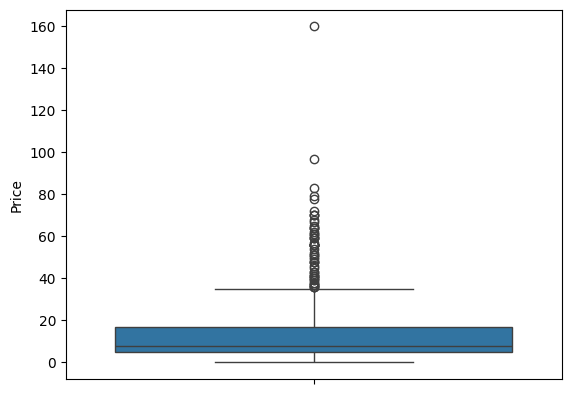

In [42]:
sns.boxplot(df["Price"])

<Axes: ylabel='Mileage'>

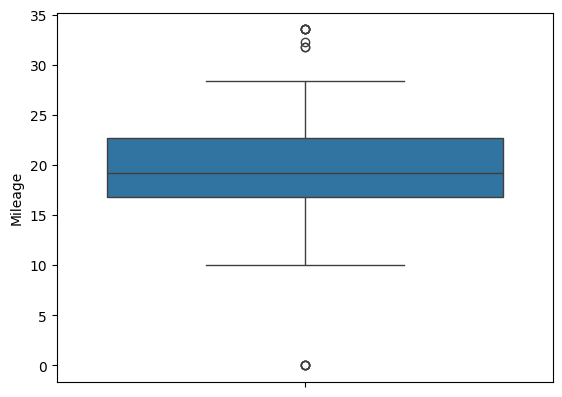

In [43]:
sns.boxplot(df["Mileage"])

<Axes: ylabel='Kilometers_Driven'>

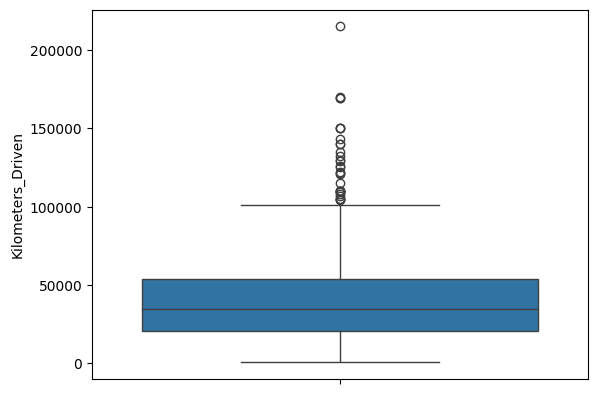

In [44]:
sns.boxplot(df["Kilometers_Driven"])

<Axes: ylabel='Engine'>

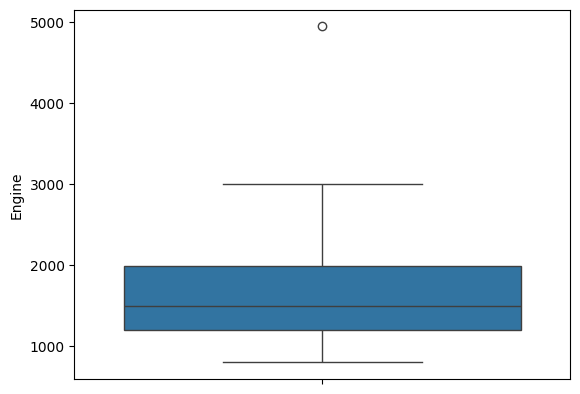

In [45]:
sns.boxplot(df["Engine"])

<Axes: ylabel='Power'>

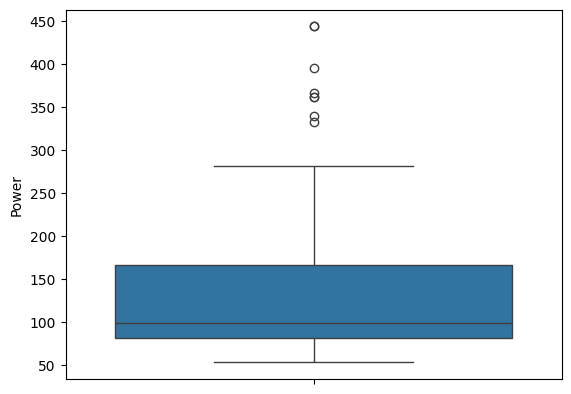

In [46]:
sns.boxplot(df["Power"])

<Axes: ylabel='Year'>

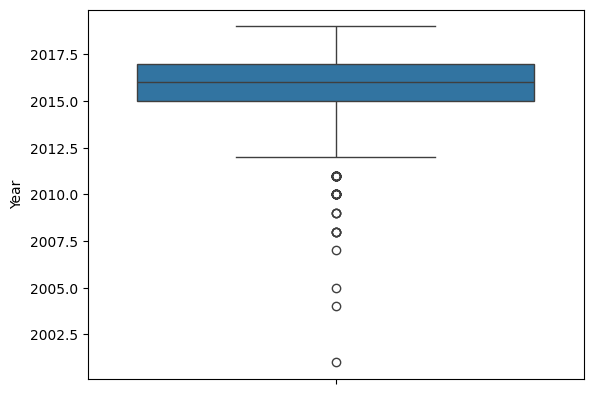

In [47]:
sns.boxplot(df["Year"])

# B) Removing outlier using IQR (Copping Method) in which we replace outlier with upperlimit or lowerlimit)

# i)For Price

In [48]:
q1=df["Price"].quantile(0.25)
q3=df["Price"].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(5.0, 17.0, 12.0)

In [49]:
url=q3+(1.5 * iqr)
lrl=q1-(1.5 * iqr)
url,lrl

(35.0, -13.0)

In [50]:
new=df.copy()
new.loc[(new["Price"]>url) ,"Price"]=url
new.loc[(new["Price"]<lrl) ,"Price"]=lrl
df["Price"]=new["Price"]

<Axes: ylabel='Price'>

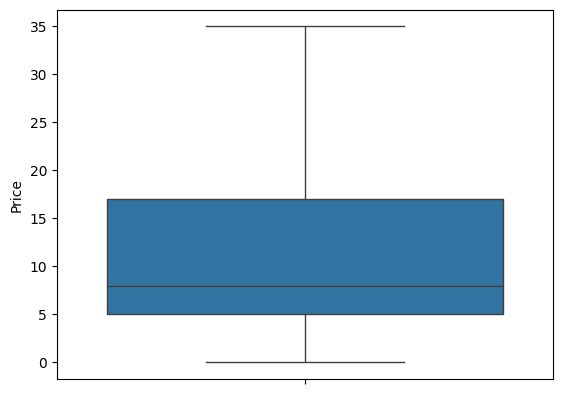

In [51]:
sns.boxplot(df["Price"])

# ii)For Mileage

In [52]:
q1=df["Mileage"].quantile(0.25)
q3=df["Mileage"].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(16.77, 22.69, 5.920000000000002)

In [53]:
url=q3+(1.5 * iqr)
lrl=q1-(1.5 * iqr)
url,lrl

(31.570000000000004, 7.889999999999997)

In [54]:
new=df.copy()
new.loc[(new["Mileage"]>url) ,"Mileage"]=url
new.loc[(new["Mileage"]<lrl) ,"Mileage"]=lrl
df["Mileage"]=new["Mileage"]

<Axes: ylabel='Mileage'>

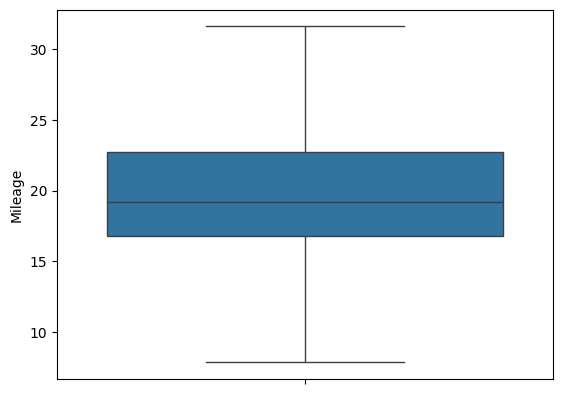

In [55]:
sns.boxplot(df["Mileage"])

# iii)For Kilometers_Driven

In [56]:
q1=df["Kilometers_Driven"].quantile(0.25)
q3=df["Kilometers_Driven"].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(20487.5, 53829.0, 33341.5)

In [57]:
url=q3+(1.5 * iqr)
lrl=q1-(1.5 * iqr)
url,lrl

(103841.25, -29524.75)

In [58]:
new=df.copy()
new.loc[(new["Kilometers_Driven"]>url) ,"Kilometers_Driven"]=url
new.loc[(new["Kilometers_Driven"]<lrl) ,"Kilometers_Driven"]=lrl
df["Kilometers_Driven"]=new["Kilometers_Driven"]

C:\Users\HP\AppData\Local\Temp\ipykernel_10844\127533939.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '103841.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new.loc[(new["Kilometers_Driven"]>url) ,"Kilometers_Driven"]=url


<Axes: ylabel='Kilometers_Driven'>

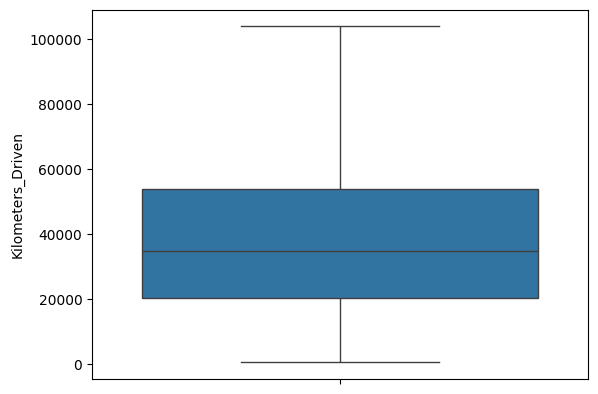

In [59]:
sns.boxplot(df["Kilometers_Driven"])

# iv)For Engine

In [60]:
q1=df["Engine"].quantile(0.25)
q3=df["Engine"].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(1197.0, 1995.0, 798.0)

In [61]:
url=q3+(1.5 * iqr)
lrl=q1-(1.5 * iqr)
url,lrl

(3192.0, 0.0)

In [62]:
new=df.copy()
new.loc[(new["Engine"]>url) ,"Engine"]=url
new.loc[(new["Engine"]<lrl) ,"Engine"]=lrl
df["Engine"]=new["Engine"]

<Axes: ylabel='Engine'>

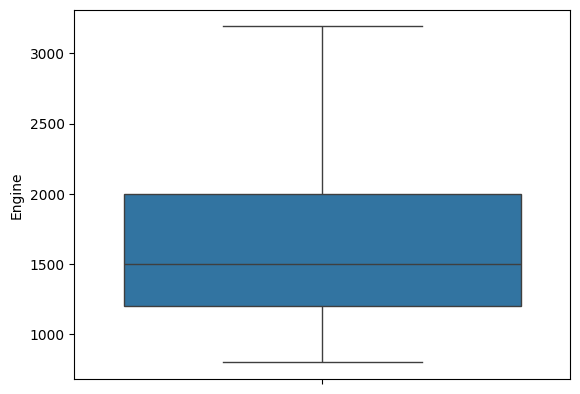

In [63]:
sns.boxplot(df["Engine"])

# v)For Power

In [64]:
q1=df["Power"].quantile(0.25)
q3=df["Power"].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(81.86, 166.85, 84.99)

In [65]:
url=q3+(1.5 * iqr)
lrl=q1-(1.5 * iqr)
url,lrl

(294.335, -45.624999999999986)

In [66]:
new=df.copy()
new.loc[(new["Power"]>url) ,"Power"]=url
new.loc[(new["Power"]<lrl) ,"Power"]=lrl
df["Power"]=new["Power"]

<Axes: ylabel='Power'>

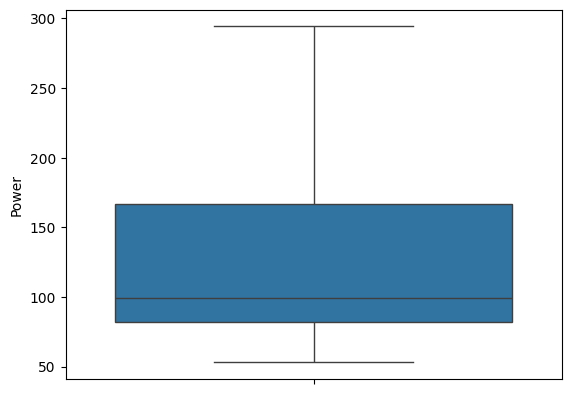

In [67]:
sns.boxplot(df["Power"])

# vi)For Year

In [68]:
q1=df["Year"].quantile(0.25)
q3=df["Year"].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(2015.0, 2017.0, 2.0)

In [69]:
url=q3+(1.5 * iqr)
lrl=q1-(1.5 * iqr)
url,lrl

(2020.0, 2012.0)

In [70]:
new=df.copy()
new.loc[(new["Year"]>url) ,"Year"]=url
new.loc[(new["Year"]<lrl) ,"Year"]=lrl
df["Year"]=new["Year"]

<Axes: ylabel='Year'>

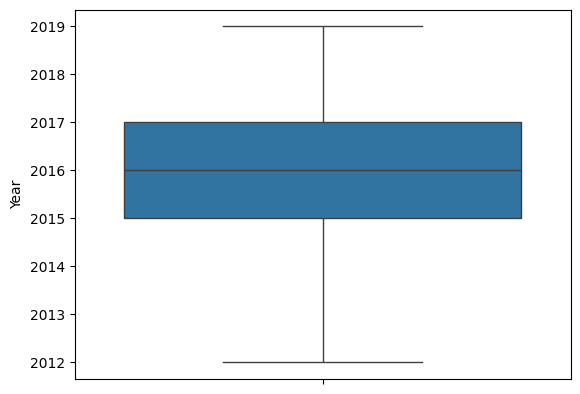

In [71]:
sns.boxplot(df["Year"])

# STEP-4

# A) Getting insight from the data through Visualization

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_10844\4197581821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


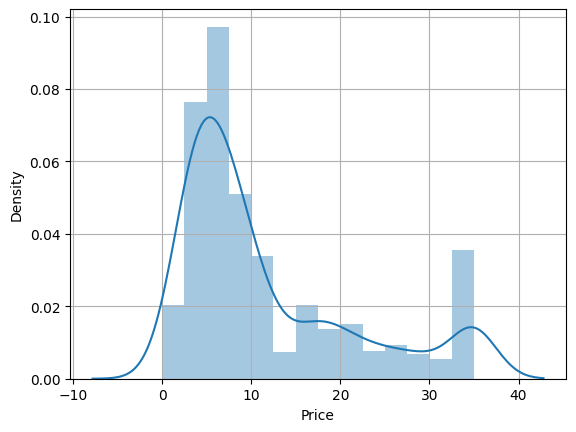

Skewness: 1.235212
Kurtosis: 0.308334


In [73]:
sns.distplot(df["Price"])
plt.plot()
plt.grid()
plt.show()

print("Skewness: %f" % df["Price"].skew())
print("Kurtosis: %f" % df["Price"].kurt())

# From the above Graph we came to know about the distribution of price

In [74]:
mean_value=np.mean(df["Kilometers_Driven"])
median_value=np.median(df["Kilometers_Driven"])
print("Mean :",mean_value)
print("Median :",median_value)

Mean : 39505.471142162816
Median : 34895.0


C:\Users\HP\AppData\Local\Temp\ipykernel_10844\4194332046.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Kilometers_Driven"],color="blue")


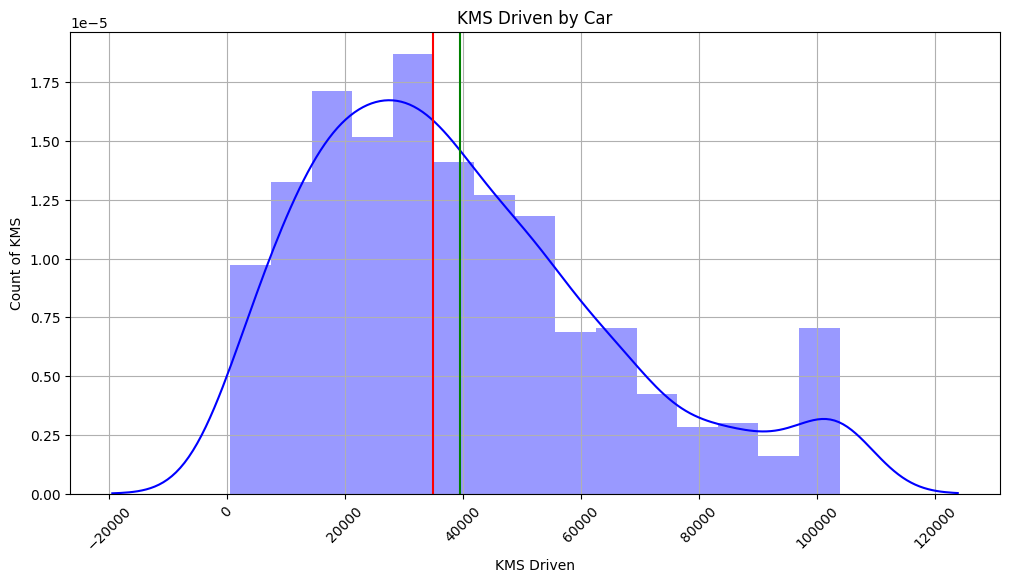

In [75]:
plt.figure(figsize=(12,6))
sns.distplot(df["Kilometers_Driven"],color="blue")
plt.grid()
plt.xlabel("KMS Driven")
plt.ylabel("Count of KMS")
plt.xticks(rotation=45)
plt.title("KMS Driven by Car")
plt.axvline(mean_value,color="green")
plt.axvline(median_value,color="red")

plt.show()

# From above graph we came to known that the most of the cars are driven in the range of 2,00,000-8,00,000 kms 

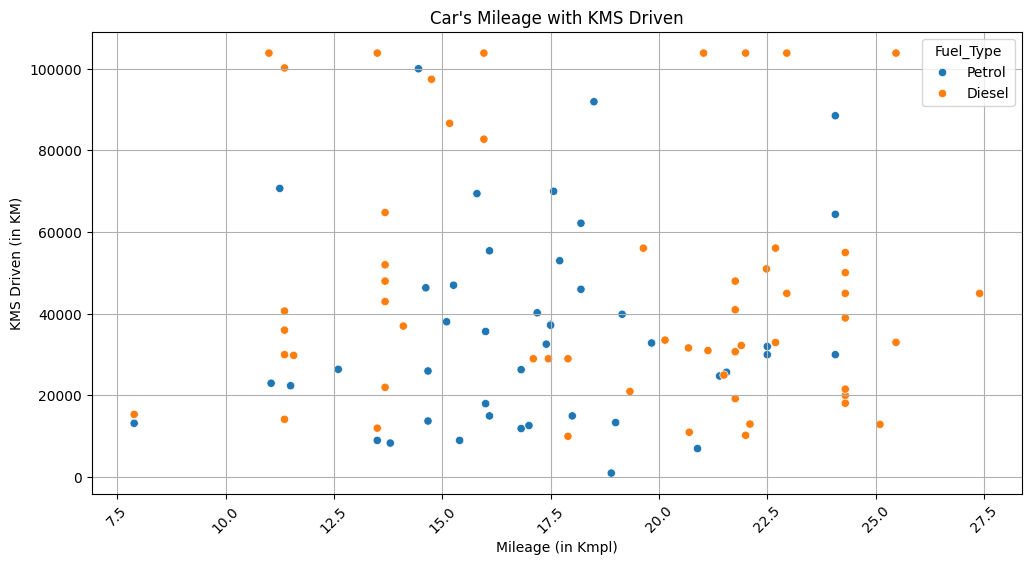

In [76]:
top100mk=df.head(100)

plt.figure(figsize=(12,6))
sns.scatterplot(data=top100mk,x="Mileage",y="Kilometers_Driven",hue="Fuel_Type")
plt.grid()
plt.xlabel("Mileage (in Kmpl)")
plt.ylabel("KMS Driven (in KM)")
plt.xticks(rotation=45)
plt.title("Car's Mileage with KMS Driven")
plt.show()


# the above graph shows behaviour of mileage with respect to the KMS Driven by Car on the basis of fuel type concluding that upto 1,00,000 kms driven the mileage provided by petrol and diesel is in the range of 10-25kmpl.

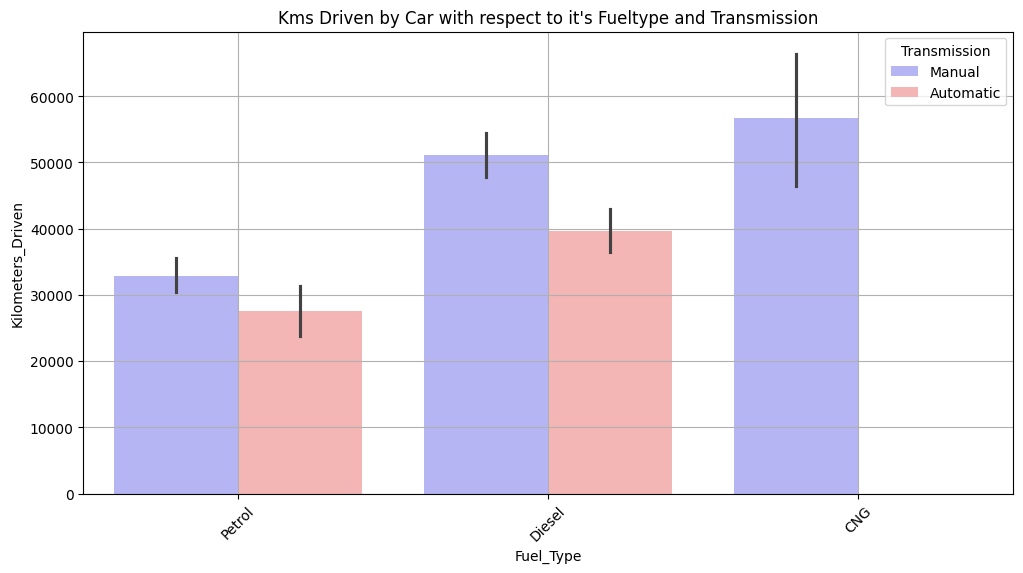

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,y="Kilometers_Driven",x="Fuel_Type",hue="Transmission",palette="bwr")
plt.grid()
plt.title("Kms Driven by Car with respect to it's Fueltype and Transmission")
plt.xticks(rotation=45)
plt.show()

# from the above graph we came to known that most of the kms are driven by diesel[Manual] car followed by cng[Manual] car and also CNG car have less number of automatic transmission compared to Petrol and Diesel

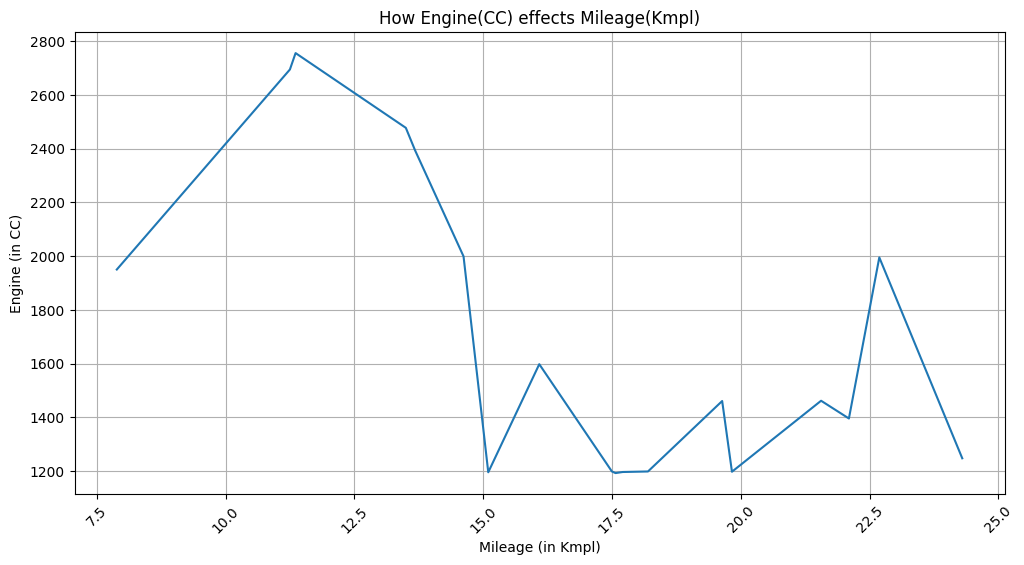

In [78]:
metop20=df.head(20)
plt.figure(figsize=(12,6))
sns.lineplot(data=metop20,x="Mileage",y="Engine")
plt.plot()
plt.xticks(rotation=45)
plt.title("How Engine(CC) effects Mileage(Kmpl)")
plt.grid()
plt.xlabel("Mileage (in Kmpl)")
plt.ylabel("Engine (in CC)")
plt.show()

# from the above graph we came to known the smaller engine(cc) have great mileage whereas bigger engine(cc)have less the mileage

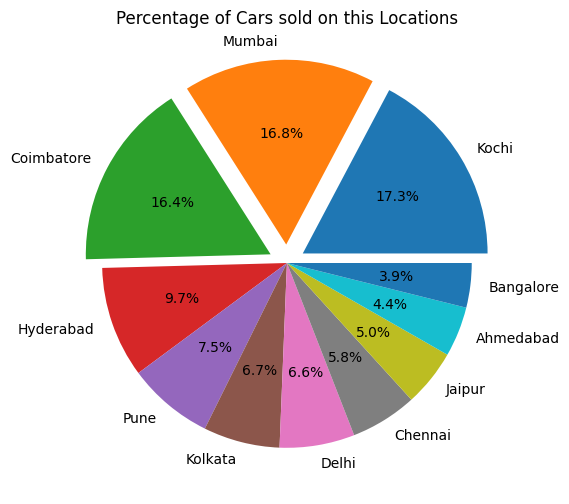

In [79]:
plt.figure(figsize=(12,6))
df["Location"].value_counts().plot.pie(autopct="%1.1f%%",explode=(0.1,0.1,0.1,0,0,0,0,0,0,0,0))
plt.title("Percentage of Cars sold on this Locations")
plt.ylabel("")
plt.show()


# from the above graph we came to known that Mumbai,Pune,Coimbatore are the top 3 location where most of the second hand cars are sold

# STEP-5

# i) Converting cat into num column

In [80]:
df_cat=df.select_dtypes(['object'])
df_num=df.select_dtypes(['int','float'])


In [81]:
df.tail(5)

,Company Name,Car Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Location,Price
5999,Tata Bolt,Revotron XT,2016,10000.0,Petrol,Manual,First,17.57,1193,88.7,5,Chennai,4
6002,Volkswagen Vento,1.6 Highline,2012,38000.0,Petrol,Manual,First,16.09,1598,103.5,5,Mumbai,3
6005,Maruti Vitara,Brezza VDi,2016,37208.0,Diesel,Manual,First,24.30,1248,88.5,5,Pune,7
6010,Honda Brio,1.2 VX,2013,33746.0,Petrol,Manual,First,18.50,1198,86.8,5,Delhi,3
6014,Maruti Swift,VDI,2014,27365.0,Diesel,Manual,First,28.40,1248,74.0,5,Delhi,4


In [82]:
df_cat

,Company Name,Car Model,Fuel_Type,Transmission,Owner_Type,Location
2,Honda Jazz,V,Petrol,Manual,First,Chennai
7,Toyota Innova,Crysta 2.8,Diesel,Automatic,First,Mumbai
10,Maruti Ciaz,Zeta,Petrol,Manual,First,Kochi
15,Mitsubishi Pajero,Sport 4X4,Diesel,Manual,First,Delhi
20,BMW 3,Series 320d,Diesel,Automatic,First,Kochi
...,...,...,...,...,...,...
5999,Tata Bolt,Revotron XT,Petrol,Manual,First,Chennai
6002,Volkswagen Vento,1.6 Highline,Petrol,Manual,First,Mumbai
6005,Maruti Vitara,Brezza VDi,Diesel,Manual,First,Pune
6010,Honda Brio,1.2 VX,Petrol,Manual,First,Delhi


In [83]:
df_num

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
2,2012,46000.00,18.20,1199,88.70,5,4
7,2016,36000.00,11.36,2755,171.50,8,17
10,2018,25692.00,21.56,1462,103.25,5,9
15,2014,103841.25,13.50,2477,175.56,7,15
20,2014,32982.00,22.69,1995,190.00,5,18
...,...,...,...,...,...,...,...
5999,2016,10000.00,17.57,1193,88.70,5,4
6002,2012,38000.00,16.09,1598,103.50,5,3
6005,2016,37208.00,24.30,1248,88.50,5,7
6010,2013,33746.00,18.50,1198,86.80,5,3


# ii)label encoding on cat column

In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [85]:
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])

In [86]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 2 to 6014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Company Name  823 non-null    int32
 1   Car Model     823 non-null    int32
 2   Fuel_Type     823 non-null    int32
 3   Transmission  823 non-null    int32
 4   Owner_Type    823 non-null    int32
 5   Location      823 non-null    int32
dtypes: int32(6)
memory usage: 25.7 KB


# iii)Applying standard scaler on numeric columns


In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_scale=sc.fit_transform(df_num)
df_scale

array([[-1.98799513e+00,  2.54501966e-01, -3.15384984e-01, ...,
        -5.89709065e-01, -3.83516872e-01, -7.74602339e-01],
       [-2.41261545e-03, -1.37369364e-01, -1.85561089e+00, ...,
         1.00147063e+00,  3.38900567e+00,  5.31951409e-01],
       [ 9.90378641e-01, -5.41310330e-01,  4.41217215e-01, ...,
        -3.10099590e-01, -3.83516872e-01, -2.72081667e-01],
       ...,
       [-2.41261545e-03, -9.00313072e-02,  1.05820829e+00, ...,
        -5.93552495e-01, -3.83516872e-01, -4.73089936e-01],
       [-1.49159950e+00, -2.25697162e-01, -2.47831217e-01, ...,
        -6.26221643e-01, -3.83516872e-01, -8.75106474e-01],
       [-9.95203872e-01, -4.75750257e-01,  1.98144312e+00, ...,
        -8.72201112e-01, -3.83516872e-01, -7.74602339e-01]])

In [88]:
df_scale = pd.DataFrame(data=df_scale,columns=df_num.columns)
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               823 non-null    float64
 1   Kilometers_Driven  823 non-null    float64
 2   Mileage            823 non-null    float64
 3   Engine             823 non-null    float64
 4   Power              823 non-null    float64
 5   Seats              823 non-null    float64
 6   Price              823 non-null    float64
dtypes: float64(7)
memory usage: 45.1 KB


# iv) joing data on basis of columns(axis=1)

In [89]:
df=pd.concat([df_cat,df_num],axis=1)

In [90]:
df

,Company Name,Car Model,Fuel_Type,Transmission,Owner_Type,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
2,27,161,2,1,0,2,2012,46000.00,18.20,1199,88.70,5,4
7,98,88,1,0,0,9,2016,36000.00,11.36,2755,171.50,8,17
10,55,191,2,1,0,7,2018,25692.00,21.56,1462,103.25,5,9
15,77,151,1,1,0,4,2014,103841.25,13.50,2477,175.56,7,15
20,6,143,1,0,0,7,2014,32982.00,22.69,1995,190.00,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,87,137,2,1,0,2,2016,10000.00,17.57,1193,88.70,5,4
6002,103,20,2,1,0,9,2012,38000.00,16.09,1598,103.50,5,3
6005,62,70,1,1,0,10,2016,37208.00,24.30,1248,88.50,5,7
6010,24,10,2,1,0,4,2013,33746.00,18.50,1198,86.80,5,3


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823 entries, 2 to 6014
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       823 non-null    int32  
 1   Car Model          823 non-null    int32  
 2   Fuel_Type          823 non-null    int32  
 3   Transmission       823 non-null    int32  
 4   Owner_Type         823 non-null    int32  
 5   Location           823 non-null    int32  
 6   Year               823 non-null    int64  
 7   Kilometers_Driven  823 non-null    float64
 8   Mileage            823 non-null    float64
 9   Engine             823 non-null    int32  
 10  Power              823 non-null    float64
 11  Seats              823 non-null    int32  
 12  Price              823 non-null    int32  
dtypes: float64(3), int32(9), int64(1)
memory usage: 61.1 KB


# STEP-6 

# i)Splitting the data into feature(X) and target variable (Y)

In [92]:
x=df[["Year","Kilometers_Driven","Fuel_Type","Transmission","Owner_Type","Mileage","Engine","Power","Seats","Location"]]
x

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Location
2,2012,46000.00,2,1,0,18.20,1199,88.70,5,2
7,2016,36000.00,1,0,0,11.36,2755,171.50,8,9
10,2018,25692.00,2,1,0,21.56,1462,103.25,5,7
15,2014,103841.25,1,1,0,13.50,2477,175.56,7,4
20,2014,32982.00,1,0,0,22.69,1995,190.00,5,7
...,...,...,...,...,...,...,...,...,...,...
5999,2016,10000.00,2,1,0,17.57,1193,88.70,5,2
6002,2012,38000.00,2,1,0,16.09,1598,103.50,5,9
6005,2016,37208.00,1,1,0,24.30,1248,88.50,5,10
6010,2013,33746.00,2,1,0,18.50,1198,86.80,5,4


In [93]:
y=df["Price"]
y

2        4
7       17
10       9
15      15
20      18
        ..
5999     4
6002     3
6005     7
6010     3
6014     4
Name: Price, Length: 823, dtype: int32

# ii)Splitting data into train and test

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
len(x_train)

658

In [97]:
len(x_test)

165

In [98]:
x_train

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Location
1797,2019,20877.0,2,1,0,18.16,1197,78.90,5,3
5271,2018,12278.0,2,0,0,23.10,998,67.04,5,7
5564,2016,62404.0,1,0,0,22.69,1995,190.00,5,7
3080,2017,24214.0,2,1,1,25.17,799,53.30,5,7
2166,2014,41460.0,2,1,0,18.50,1198,86.80,5,7
...,...,...,...,...,...,...,...,...,...,...
456,2018,12923.0,1,1,0,25.10,1248,88.50,5,4
750,2015,18955.0,2,0,0,18.00,1497,117.30,5,1
2008,2017,67000.0,1,1,0,13.68,2393,147.80,7,5
3127,2017,35981.0,1,1,0,24.30,1248,88.50,5,7


In [99]:
y_test

4570    11
1256     5
423     24
1200    12
2041     4
        ..
2111    35
1544     7
3190    18
5625     5
3820     2
Name: Price, Length: 165, dtype: int32

# STEP-7 

# i) Building LinearRegression Model

In [100]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [101]:
lr.fit(x_train,y_train)

LinearRegression()

In [102]:
a=lr.predict(x_test)
a

array([14.66388404,  1.49907197, 20.59516386, 15.63995652, -1.64343294,
        7.87238251,  7.87003813, 24.91106787,  3.21142061, -1.50947015,
        2.44572904, 21.96682146, 24.43443613,  4.94013346, 24.27152734,
        9.98593991, 25.85700062,  1.37302919,  6.87661058, 21.58375422,
       14.62933614,  3.47482093,  1.14375298,  1.70973296, 25.46464505,
       12.99743252,  6.08531504,  5.61349411, 17.91053127, 20.74856743,
        7.28007392, 18.46066261,  9.6799131 ,  8.86242866,  0.83433139,
        0.35799458,  5.31173887, 22.81933455, 23.50452446, 20.25146773,
       -3.16126854, 10.78432037, 16.22847275,  4.92650839,  7.44108316,
       11.09859999, 23.54788836, -0.19436611, 37.404748  , 18.19128928,
       12.53630488, 22.09873776,  8.42303362, 25.89479642,  9.56652477,
        4.12566107, 29.58608225, 15.02591007,  2.76422102, 11.57370034,
        3.27456796, 33.32829741, 22.91423077, 10.42384392, 20.8348861 ,
       19.4525327 , 14.87341615, 26.00761483,  1.54155238, 27.81

In [103]:
lr.score(x_test,y_test)

0.7952196474056805

# Hypertuning the model as the accuracy is low 

In [104]:
hypergrid=[{"penalty": ["11","12","elasticnet","none"],"c":["np.logspace(-4,4,20)"],"solver":["lbfgs","newton-cg","liblinear","sag","saga"],"max_iter":[100,1000,2500,5000]}]

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]}

In [107]:
bestacc=GBR.fit(x_train,y_train)

In [108]:
bestacc.score(x_test,y_test)

0.9188776221438721

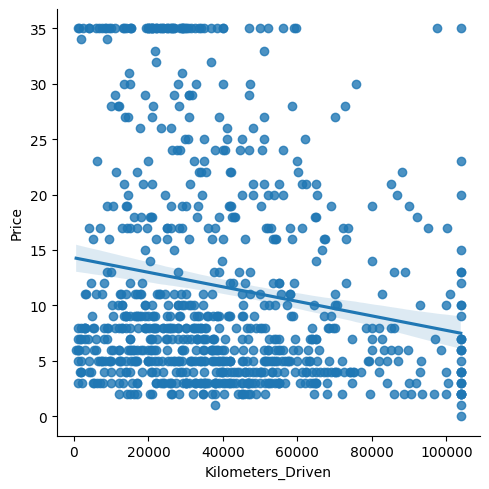

In [109]:
x=df["Kilometers_Driven"].head(10)
y=df["Price"].head(10)

sns.lmplot(x="Kilometers_Driven",y="Price",data=df)

# ii)Building DecisionTreeRegressor Model

In [110]:
from sklearn.tree import DecisionTreeRegressor

In [111]:
class_1=DecisionTreeRegressor()

In [112]:
class_1.fit(x_train,y_train)

DecisionTreeRegressor()

In [113]:
class_1.predict(x_test)

array([11.,  4., 35., 10.,  3.,  6.,  3., 19.,  5.,  2.,  5., 19., 35.,
        7., 35.,  6., 19.,  2.,  5., 19.,  9.,  3.,  4.,  4., 33., 10.,
        3.,  5., 14., 15.,  7., 10.,  3.,  6.,  2.,  4.,  6., 25., 19.,
       13.,  2., 13., 31.,  5.,  9., 10., 35.,  3., 35., 18.,  9., 19.,
        9., 35.,  8.,  6., 11.,  9.,  5.,  7.,  3., 35., 35.,  6., 22.,
       22., 11., 27.,  4., 35.,  9.,  4.,  3.,  6., 35.,  4.,  8.,  8.,
        2.,  5.,  2.,  4., 17., 13., 24., 22., 13., 12., 19.,  3.,  6.,
        4.,  6.,  8.,  7.,  7.,  3.,  3.,  4.,  2.,  5., 13.,  8., 35.,
       10.,  2.,  5.,  9., 10.,  6.,  3.,  4.,  3.,  3.,  3.,  3.,  3.,
        8.,  2., 20.,  7.,  4., 16.,  9.,  5., 10.,  7., 11.,  3., 22.,
       35., 29., 30.,  3.,  5.,  2.,  8.,  2.,  3., 35.,  4.,  7., 30.,
       25.,  5.,  9.,  6.,  5.,  6.,  9.,  9.,  6.,  8.,  9., 20.,  7.,
        9., 10.,  5., 27., 35., 11., 18.,  3.,  3.])

In [114]:
class_1.score(x_test,y_test)

0.816081056152738

# iii)Building RandomForestRegressor Model

In [115]:
from sklearn.ensemble import RandomForestRegressor
class_2=RandomForestRegressor()
class_2.fit(x_train,y_train)

RandomForestRegressor()

In [116]:
y_pred=class_2.predict(x_test)
y_pred

array([11.36,  3.84, 24.2 , 13.94,  3.21,  5.31,  5.71, 22.51,  3.53,
        2.61,  3.71, 19.03, 21.81,  5.46, 32.57,  9.19, 19.67,  3.8 ,
        5.1 , 19.67,  9.94,  3.18,  3.91,  4.13, 31.74, 14.63,  4.57,
        6.24, 12.53, 17.25,  7.05, 24.02,  3.23,  5.47,  2.28,  4.47,
        5.39, 24.77, 19.55, 18.72,  2.42, 10.69, 26.05,  5.9 ,  8.59,
        9.58, 32.65,  2.69, 28.7 , 23.56,  9.17, 19.06,  8.66, 29.47,
        9.24,  4.53, 22.9 ,  9.49,  3.53,  8.14,  3.28, 30.48, 33.74,
        6.57, 19.6 , 20.19, 12.83, 26.09,  4.5 , 34.08,  9.11,  3.99,
        2.74,  9.52, 31.7 ,  5.63,  7.79,  7.43,  2.72,  4.43,  2.27,
        4.34, 19.58, 10.97, 23.22, 22.78,  9.59, 10.89, 18.55,  2.73,
        5.87,  4.3 ,  6.62,  6.9 , 10.32,  6.57,  2.81,  3.59,  4.36,
        3.66,  4.99, 16.37,  7.6 , 21.03,  8.24,  2.27,  4.64,  8.53,
        9.9 ,  6.11,  2.72,  3.81,  3.34,  3.59,  3.7 ,  4.46,  3.04,
        8.38,  2.88, 17.68,  7.26,  2.97, 17.02,  6.82,  4.33,  9.81,
       22.83, 13.22,

In [117]:
class_2.score(x_test,y_test)

0.919713490675316

# iv)Building KNeighborsRegressor Model

In [118]:
from sklearn.neighbors import KNeighborsRegressor

In [119]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [120]:
y_pred=knn.predict(x_test)
y_pred

array([ 9.        ,  4.66666667, 14.33333333, 26.33333333, 13.66666667,
        5.33333333,  4.66666667, 18.        ,  3.33333333,  9.33333333,
        6.        , 21.33333333, 11.33333333,  7.        , 23.66666667,
        4.        , 12.66666667,  9.        ,  7.        , 17.33333333,
        8.66666667,  6.33333333,  4.66666667,  4.33333333, 25.33333333,
        7.        ,  4.66666667,  6.33333333, 15.66666667,  9.33333333,
        5.33333333, 12.33333333,  3.33333333,  5.66666667,  6.33333333,
       14.33333333,  3.33333333,  4.66666667, 32.        , 17.        ,
        5.66666667, 20.66666667,  6.33333333,  4.33333333,  7.        ,
        8.33333333, 16.66666667,  4.66666667, 31.33333333, 32.        ,
        7.        , 32.        ,  5.        , 16.        ,  5.33333333,
        6.33333333, 13.66666667,  5.66666667,  3.33333333, 10.        ,
        5.33333333, 32.        , 25.66666667,  4.66666667, 16.        ,
       27.33333333,  6.66666667, 22.66666667,  7.33333333, 26.  

In [121]:
knn.score(x_train,y_train)

0.7869557253419135

# From the above Trained Models, LinearRegression Model with hypertuning provided me the best accuracy of around 91% which will help to get the price in an more efficient manner.

# From this ML Project I came across many challenges that helped me to understand the concept in more detail and i was able to solve the problem related to this project.